# Linear Layer

In [5]:
import torch # pytorch
from torch import nn # neural networks

# set seed for reproducibility
torch.manual_seed(42)

# create a perceptron
perceptron = nn.Linear(3, 1) # 3 inputs, 1 output - Doc: https://pytorch.org/docs/stable/nn.html#torch.nn.Linear
print(perceptron) 

Linear(in_features=3, out_features=1, bias=True)


In [34]:
# access the weight and bias through the named_parameters method
for nome, tensor in perceptron.named_parameters():
  print(nome, tensor.data)
  
print('---')
# access the weight and bias through the weight and bias attributes
print(perceptron.weight.data)
print(perceptron.bias.data)

# load the weights and bias
w1, w2, w3 = perceptron.weight.data.numpy()[0]
b = perceptron.bias.data.numpy()

# equation of the hyperplane
# w1 * x1 + w2 * x2 + w3 * x3 + b = 0

weight tensor([[ 0.4414,  0.4792, -0.1353]])
bias tensor([0.5304])
---
tensor([[ 0.4414,  0.4792, -0.1353]])
tensor([0.5304])


In [17]:
# Plot the hyperplane on a 3D graph

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot3d(perceptron):
  w1, w2, w3 = perceptron.weight.data.numpy()[0]
  b = perceptron.bias.data.numpy()
  
  X1 = np.linspace(-1,1,10)
  X2 = np.linspace(-1,1,10)

  X1, X2 = np.meshgrid(X1,X2)

  X3 = (b - w1*X1 - w2*X2) / w3
  
  fig = plt.figure(figsize=(10, 8))

  ax = fig.add_subplot(projection = '3d')
  ax.view_init(azim=180)
  
  ax.plot_surface(X1, X2, X3, cmap='Blues', alpha=0.6)
  

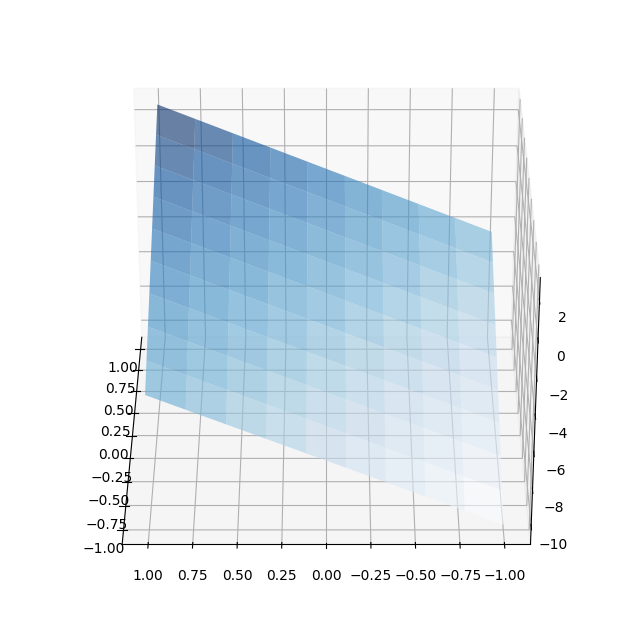

In [18]:
plot3d(perceptron)

X1: It is under the hyperplane!
X2: It is above the hyperplane!


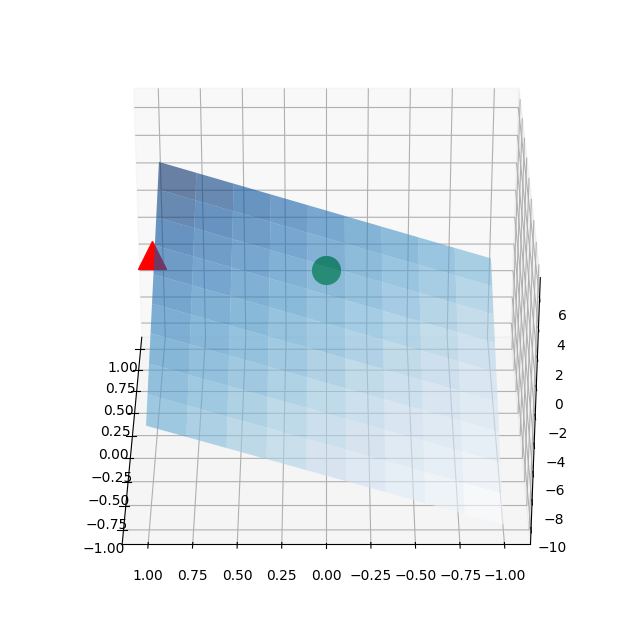

In [33]:
# Test the perceptron

# create a tensor with 3 elements
x = torch.Tensor([0, 1, 2])

# add a dimension to the tensor and print the result
y = perceptron(x)
print("X1: It is under the hyperplane!") if y > 0 else print("X1: It is above the hyperplane!")

x2 = torch.Tensor([-1, 0, 7])
y2 = perceptron(x2)
print("X2: It is under the hyperplane!") if y2 > 0 else print("X2: It is above the hyperplane!")

# plot the point on the hyperplane
plot3d(perceptron)
plt.plot([x[0]], [x[1]], [x[2]], color='r', marker='^', markersize=20)
plt.plot([x2[0]], [x2[1]], [x2[2]], color='g', marker='o', markersize=20)